# 📊 Option Greeks – Delta, Gamma, Vega
This notebook explores how the Greeks behave across different stock prices for an ATM European Call Option.

### 🧾 Assumptions
- Stock Price Range: ₹50 to ₹150
- Strike Price (K): ₹100 (At-the-money)
- Time to Expiry: 30 days
- Volatility (σ): 25%
- Risk-Free Rate (r): 5%

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Function to calculate Greeks
def calculate_greeks(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    delta = norm.cdf(d1)
    gamma = norm.pdf(d1) / (S * sigma * np.sqrt(T))
    vega = S * norm.pdf(d1) * np.sqrt(T) / 100
    return delta, gamma, vega

In [2]:
# Parameters
S_values = np.linspace(50, 150, 100)
K = 100
T = 30 / 365
r = 0.05
sigma = 0.25

# Store values
deltas, gammas, vegas = [], [], []

for S in S_values:
    delta, gamma, vega = calculate_greeks(S, K, T, r, sigma)
    deltas.append(delta)
    gammas.append(gamma)
    vegas.append(vega)

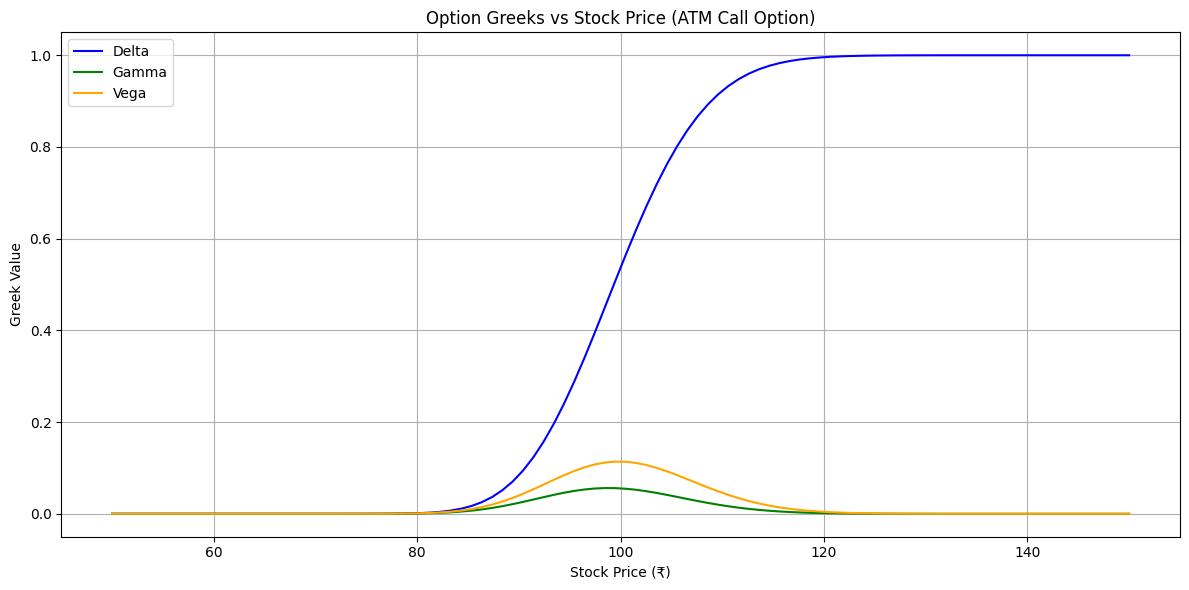

In [3]:
# Plotting Greeks
plt.figure(figsize=(12, 6))
plt.plot(S_values, deltas, label='Delta', color='blue')
plt.plot(S_values, gammas, label='Gamma', color='green')
plt.plot(S_values, vegas, label='Vega', color='orange')
plt.title('Option Greeks vs Stock Price (ATM Call Option)')
plt.xlabel('Stock Price (₹)')
plt.ylabel('Greek Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### 🔍 Insights
- ✅ **Delta** increases as the stock price rises; shows how much the option moves per ₹1 move in stock.
- ✅ **Gamma** peaks around ₹100 — indicates highest Delta risk when ATM.
- ✅ **Vega** is also highest at ₹100 — volatility risk is max at-the-money.

🧠 Fund managers use this to plan hedging and volatility trades.

> 🔧 Inspired using ChatGPT, customized using my own assumptions and understanding.